<a href="https://colab.research.google.com/github/lookee/seir-model/blob/master/malaria_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Infection Spread Simulator Construction Kit**

** MALARIA MODEL **

![MALARIA](https://github.com/lookee/seir-model/blob/master/img/P_vivax_trophozoite4.jpg?raw=true)

[Luca Amore](https://www.lucaamore.com)


[GITHUB](https://github.com/lookee/seir-model)



**Malaria cross-transmission equations**
\[
\begin{aligned}
\frac{d I_h}{dt} &= h\Big(\beta_{mh}(t)\,I_m\left(1 - \frac{I_h}{N_h}\right) - \frac{I_h}{\tau_h}\Big),\\
\frac{d I_m}{dt} &= h\Big(\beta_{hm}(t)\,I_h\left(1 - \frac{I_m}{N_m}\right) - \frac{I_m}{\tau_m}\Big).
\end{aligned}
\]
Here `I_h` and `I_m` are infected humans and mosquitoes, `N_h` and `N_m` their total populations, `\tau_h` and `\tau_m` are the mean infectious and life-time durations, and `h` is the numerical step (1 day). The effective bite rates are
\[
\beta_{mh}(t) = b\,p_{mh}\,\chi(t), \qquad \beta_{hm}(t) = b\,p_{hm}\,\chi(t),
\]
where \(b\) is the bites-per-mosquito rate, `p_mh`/`p_hm` are transmission probabilities, and \(\chi(t)\) drops from 1 to \(1-\text{bite\_reduction}\) after day 100 to model the introduction of bed nets, matching the logic implemented in the code.


In [0]:
########################################
### MALARIA PARAMETERS
########################################

bites_per_day_and_mosquito = 0.1 # 1 / (day * mosquito)
transmission_probability_mosquito_to_human = 0.3 # probability
transmission_probability_human_to_mosquito = 0.5 # probability
human_recovery_time = 70.0 # days
mosquito_lifetime = 10.0 # days
bite_reduction_by_net = 0.9 # probability
h = 1. # day

# MALARIA VIRUS MODEL
def virus (infected_humans, infected_mosquitoes ,t):

  # basic virus model
  net_factor = 1.0

  if t * h >= 100.:   # after 100 days, the net_factor will be reduced by bites_reduction_by_net
    net_factor = 1.0 - bite_reduction_by_net
  
  human_health_rate = (total_humans-infected_humans)/total_humans
  mosquitoes_health_rate = (total_mosquitoes - infected_mosquitoes) / total_humans

  d_infected_humans = \
    + h * (net_factor * bites_per_day_and_mosquito * infected_mosquitoes * human_health_rate * transmission_probability_mosquito_to_human \
    - 1.0 / human_recovery_time * infected_humans)
  
  d_infected_mosquitoes = \
    + h * (net_factor * bites_per_day_and_mosquito * infected_humans * mosquitoes_health_rate * transmission_probability_human_to_mosquito \
    - 1.0 / mosquito_lifetime * infected_mosquitoes)
  
  return (d_infected_humans, d_infected_mosquitoes)

In [0]:
###################################
# MALARIA STARTING CONDITIONS
###################################

total_humans = 1e8
total_mosquitoes = 1e10
start_infected_humans = 0
start_infected_mosquitoes = 1e6

# days of simulation (h = 1)
days = 400

In [0]:
###################################
# SIMULATOR
###################################

import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

# virus model wrapper
def model(x,t):
  (infected_humans, infected_mosquitoes) = (x[0], x[1]);
  return virus(infected_humans, infected_mosquitoes, t)

# differential equations system solver
t = np.linspace(0, days, days)
x0 = [start_infected_humans, start_infected_mosquitoes]
x = odeint(model, x0, t)

# series
(infected_humans, infected_mosquitoes) = (x[:,0], x[:,1]) 

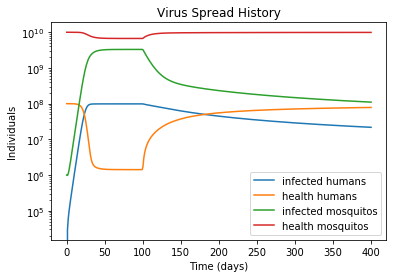

In [21]:
###################################
# VIRUS SPREAD HISTORY
###################################

plt.semilogy(t,infected_humans, label='infected humans')
plt.semilogy(t,total_humans - infected_humans, label='health humans')
plt.semilogy(t,infected_mosquitoes, label='infected mosquitos')
plt.semilogy(t,total_mosquitoes - infected_mosquitoes, label='health mosquitos')
plt.title("Virus Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

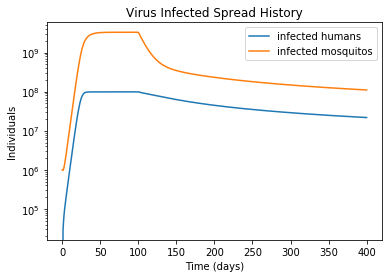

In [27]:
###################################
# INFECTED SPREAD HISTORY
###################################

plt.semilogy(t,infected_humans, label='infected humans')
plt.semilogy(t,infected_mosquitoes, label='infected mosquitos')
plt.title("Virus Infected Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

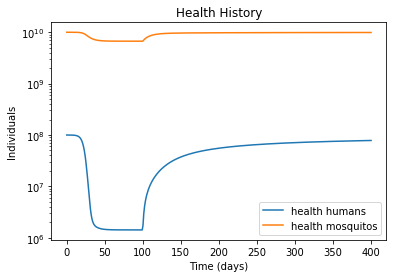

In [28]:
###################################
# HEALTH HISTORY
###################################
plt.semilogy(t,total_humans - infected_humans, label='health humans')
plt.semilogy(t,total_mosquitoes - infected_mosquitoes, label='health mosquitos')
plt.title("Health History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

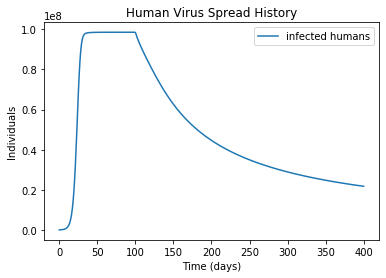

In [29]:
###################################
# HUMAN VIRUS SPREAD HISTORY
###################################

plt.plot(t,infected_humans, label='infected humans')
plt.title("Human Virus Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

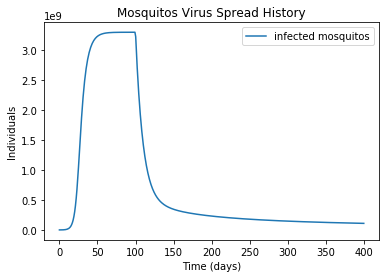

In [30]:
###################################
# MOSQUITOES VIRUS SPREAD HISTORY
###################################

plt.plot(t,infected_mosquitoes, label='infected mosquitos')
plt.title("Mosquitos Virus Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

In [0]:
##############################################################################
#    Copyright (C) 2020 Luca Amore <luca.amore at gmail.com>
#
#    Virus Spread Simulator Construction Kit
#    is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#
#    frk is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.
#
#    You should have received a copy of the GNU General Public License
#    along with frk.  If not, see <http://www.gnu.org/licenses/>.
##############################################################################